In [21]:
import matplotlib.pyplot as plt
import numpy as np
import flet as ft
import io
import base64
from pylsl import StreamInlet, resolve_stream
from scipy.signal import welch, spectrogram
import pyxdf

In [22]:
from scipy.signal import butter, lfilter, welch, filtfilt, iirnotch
import datetime
# Create a function to design a filter (function output b, a = filter coefficients)
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs # define nyquist frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandstop(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='bandstop')
    
    return b, a
# Create a function to re-reference data to CAR
def common_average_reference(data):
    common_average = np.mean(data, axis=0) # For each channel we calculate the average across time points
    data_car = data - common_average
    return data_car


In [87]:
streams, header = pyxdf.load_xdf('../SSVEP_data/6Hz/6hz_1')
raw_data = streams[0]["time_series"].T #From Steam variable this query is EEG data

In [88]:
raw_data.shape

(8, 20920)

In [89]:
# data = raw_data[0:4, 2000:3000]
data = raw_data[0:4,:]
data.shape

(4, 20920)

In [90]:
# data = common_average_reference(data)

In [91]:
fs = 250
lowcut = 2
highcut = 50
order = 1
b, a = butter_bandpass(lowcut, highcut, fs, order)
filtered_data = filtfilt(b,a, data)
print(filtered_data.shape)
# fs = 250 
# f0 = 31   
# Q = 30    
# b, a = iirnotch(f0, Q, fs)
# filtered_data = filtfilt(b, a, filtered_data)
# fs = 250 
lowcut = 30 
highcut = 33  
order = 8
s = datetime.datetime.now()
b, a = butter_bandstop(lowcut, highcut, fs, order)
filtered_data = filtfilt(b, a, filtered_data)
r = datetime.datetime.now() - s
print(r)
# filtered_data = data

(4, 20920)
0:00:00.003027


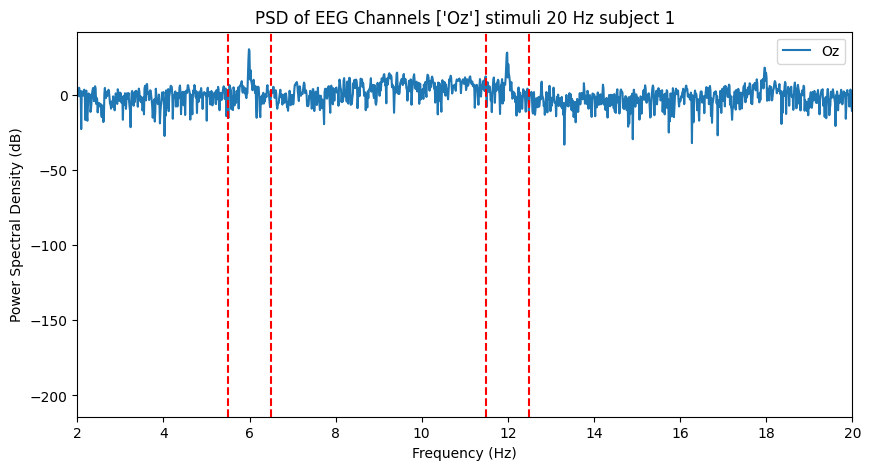

In [94]:
selected_channels = ['Oz']  # เลือกช่องที่ต้องการพล็อต
channels = ['Oz', 'Pz', 'O2', 'O1']
sfr = 20
subject = 1
                
plt.figure(figsize=(10, 5))  # สร้างกราฟเพียงครั้งเดียว
for selected_channel in selected_channels:
    channel_index = channels.index(selected_channel)
    f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg=len(data[channel_index]))
    # f, Pxx = welch(filtered_data[channel_index], fs=250, nperseg= 250*4)
    # noverlap = nperseg//2
    psds_mean = np.mean(Pxx)

    plt.plot(f, 10 * np.log10(Pxx), label=f'{selected_channel}')  # เพิ่ม label ให้แต่ละช่อง

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.title(f'PSD of EEG Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
    plt.axvline(x=5.5, color='r', linestyle='--') 
    plt.axvline(x=6.5, color='r', linestyle='--') 
    plt.axvline(x=11.5, color='r', linestyle='--') 
    plt.axvline(x=12.5, color='r', linestyle='--') 
    plt.legend()
    plt.xlim([2, 20])
    plt.legend()

In [35]:
len(f)

501

In [36]:
f[0:120]

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75, 25.  , 25.25, 25.5 , 25.75, 26.  , 26.25, 26.5 , 26.75,
       27.  , 27.25, 27.5 , 27.75, 28.  , 28.25, 28.5 , 28.75, 29.  ,
       29.25, 29.5 , 29.75])

In [37]:
Pxx

array([1.03875506e+00, 7.18401418e-01, 5.37215999e-01, 1.20570793e+00,
       1.89617395e+00, 2.48672258e+00, 2.70912642e+00, 3.88339801e+00,
       4.79987564e+00, 4.11496425e+00, 4.10106580e+00, 3.77141247e+00,
       3.36305231e+00, 4.41115286e+00, 3.43331143e+00, 3.51620844e+00,
       4.85611622e+00, 5.31349535e+00, 4.38655273e+00, 3.88055507e+00,
       3.35251681e+00, 2.79674931e+00, 2.64210356e+00, 2.51023731e+00,
       3.16622169e+00, 3.12825677e+00, 3.27421952e+00, 3.50983535e+00,
       3.74517181e+00, 3.71028825e+00, 3.78613988e+00, 3.11574492e+00,
       2.88596228e+00, 3.39049866e+00, 3.79482148e+00, 5.08454743e+00,
       5.06721922e+00, 7.17517804e+00, 7.12639157e+00, 5.94198558e+00,
       7.68224744e+00, 7.23571102e+00, 5.98310786e+00, 5.95373838e+00,
       5.41195470e+00, 4.44772116e+00, 3.88990173e+00, 2.38338216e+00,
       2.57907646e+00, 3.63776156e+00, 3.71407546e+00, 4.23874069e+00,
       2.91795657e+00, 2.37739901e+00, 3.21627133e+00, 2.45444614e+00,
      

In [38]:
len(Pxx)

501

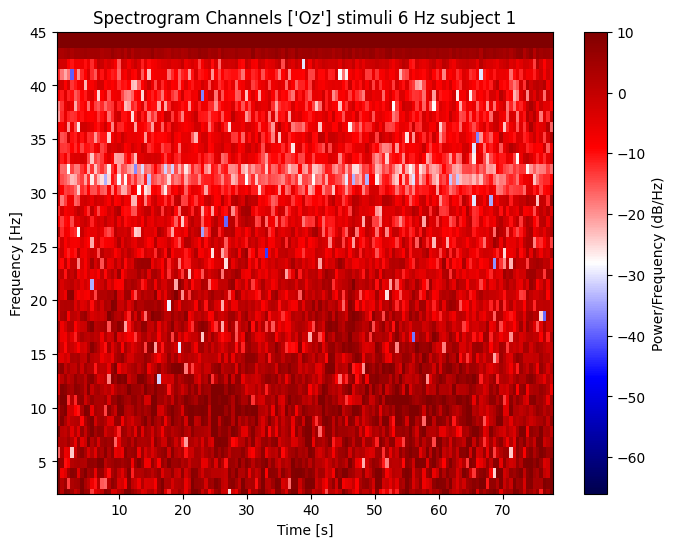

In [39]:
f, t, Sxx = spectrogram(filtered_data[channel_index] - filtered_data[1], fs=fs, noverlap=fs//2)

# มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), 10)

# พล็อต Spectrogram
plt.figure(figsize=(8, 6))
plt.ylim([2, 45])  # กำหนดช่วงความถี่
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='seismic')  # พล็อต Spectrogram
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title(f'Spectrogram Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
plt.clim([10, -60])  # กำหนดช่วงสี
plt.show()

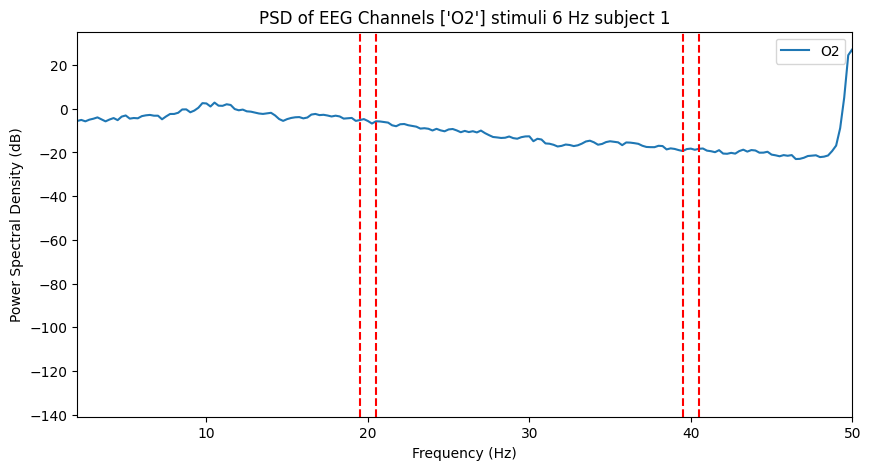

In [46]:
selected_channels = ['O2']  # เลือกช่องที่ต้องการพล็อต
channels = ['Oz', 'Pz', 'O2', 'O1']
sfr = 6
                
plt.figure(figsize=(10, 5))  # สร้างกราฟเพียงครั้งเดียว
for selected_channel in selected_channels:
    channel_index = channels.index(selected_channel)
    # f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg=len(data[channel_index]))
    f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg= 250*4)
    psds_mean = np.mean(Pxx)

    plt.plot(f, 10 * np.log10(Pxx), label=f'{selected_channel}')  # เพิ่ม label ให้แต่ละช่อง

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.title(f'PSD of EEG Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
    plt.axvline(x=19.5, color='r', linestyle='--') 
    plt.axvline(x=20.5, color='r', linestyle='--') 
    plt.axvline(x=39.5, color='r', linestyle='--') 
    plt.axvline(x=40.5, color='r', linestyle='--')   
    plt.legend()
    plt.xlim([2, 50])
    plt.legend()

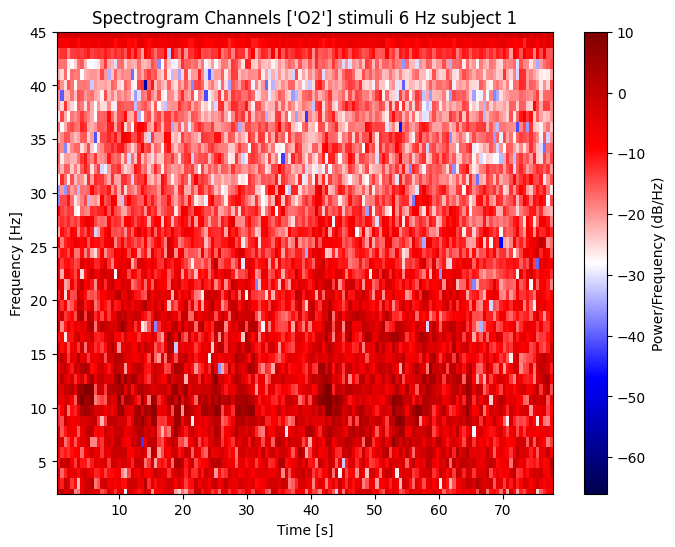

In [47]:
f, t, Sxx = spectrogram(filtered_data[channel_index] - filtered_data[1], fs=fs, noverlap=fs//2)

# มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), 10)

# พล็อต Spectrogram
plt.figure(figsize=(8, 6))
plt.ylim([2, 45])  # กำหนดช่วงความถี่
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='seismic')  # พล็อต Spectrogram
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title(f'Spectrogram Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
plt.clim([10, -60])  # กำหนดช่วงสี
plt.show()

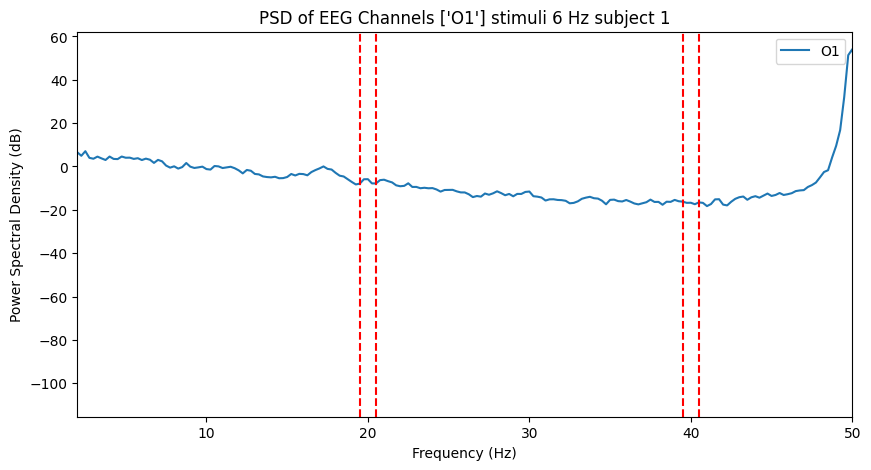

In [48]:
selected_channels = ['O1']  # เลือกช่องที่ต้องการพล็อต
channels = ['Oz', 'Pz', 'O2', 'O1']
sfr = 6
                
plt.figure(figsize=(10, 5))  # สร้างกราฟเพียงครั้งเดียว
for selected_channel in selected_channels:
    channel_index = channels.index(selected_channel)
    # f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg=len(data[channel_index]))
    f, Pxx = welch(filtered_data[channel_index] - filtered_data[1], fs=250, nperseg= 250*4)
    psds_mean = np.mean(Pxx)

    plt.plot(f, 10 * np.log10(Pxx), label=f'{selected_channel}')  # เพิ่ม label ให้แต่ละช่อง

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.title(f'PSD of EEG Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
    plt.axvline(x=19.5, color='r', linestyle='--') 
    plt.axvline(x=20.5, color='r', linestyle='--') 
    plt.axvline(x=39.5, color='r', linestyle='--') 
    plt.axvline(x=40.5, color='r', linestyle='--') 
    plt.legend()
    plt.xlim([2, 50])
    plt.legend()

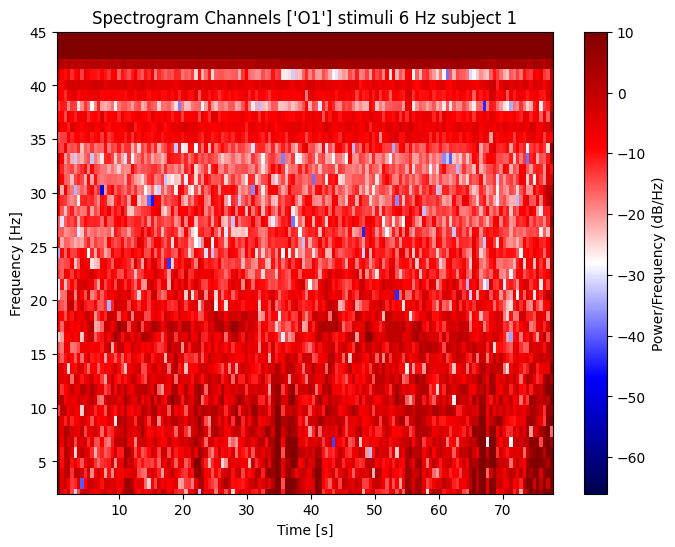

In [49]:
f, t, Sxx = spectrogram(filtered_data[channel_index] - filtered_data[1], fs=fs, noverlap=fs//2)

# มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), 10)

# พล็อต Spectrogram
plt.figure(figsize=(8, 6))
plt.ylim([2, 45])  # กำหนดช่วงความถี่
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='seismic')  # พล็อต Spectrogram
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title(f'Spectrogram Channels {selected_channels} stimuli {sfr} Hz subject {subject}')
plt.clim([10, -60])  # กำหนดช่วงสี
plt.show()

In [44]:
# f, t, Sxx = spectrogram(filtered_data[channel_index] - filtered_data[1], fs=fs, noverlap=fs//2)

# # มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
# Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), 10)

# # พล็อต Spectrogram
# plt.figure(figsize=(8, 6))
# plt.ylim([2, 50])  # กำหนดช่วงความถี่
# plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='seismic')  # พล็อต Spectrogram
# plt.xlabel('Time [s]')
# plt.ylabel('Frequency [Hz]')
# plt.colorbar(label='Power/Frequency (dB/Hz)')
# plt.title('Spectrogram')
# plt.clim([10, -40])  # กำหนดช่วงสี
# plt.show()

In [45]:
# # มาสก์ค่าใน Sxx ที่ต่ำกว่า 10
# Sxx_masked = np.ma.masked_less(10 * np.log10(Sxx), -60)

# # พล็อต Spectrogram
# plt.figure(figsize=(8, 6))
# plt.ylim([2, 40])  # กำหนดช่วงความถี่
# plt.pcolormesh(t, f, Sxx_masked, cmap='seismic')  # พล็อต Spectrogram
# plt.xlabel('Time [s]')
# plt.ylabel('Frequency [Hz]')
# plt.colorbar(label='Power/Frequency (dB/Hz)')
# plt.title('Spectrogram with values below 10 masked')
# plt.clim([10, -40])  # กำหนดช่วงสี
# plt.show()